In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_excel(r"C:\Users\Tilak Tyagi\Desktop\Elevate Labs\28-April\traintitanic.xlsx")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NO,LOWER,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,YES,UPPER,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,YES,LOWER,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,YES,UPPER,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,NO,LOWER,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,NO,MIDDLE,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
885,888,YES,UPPER,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
886,889,NO,LOWER,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
887,890,YES,UPPER,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg


In [4]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,29.642093,0.524184,0.382452,32.096681
std,256.998173,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    object 
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.5+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

# **EDA**

## **Survival Rate**

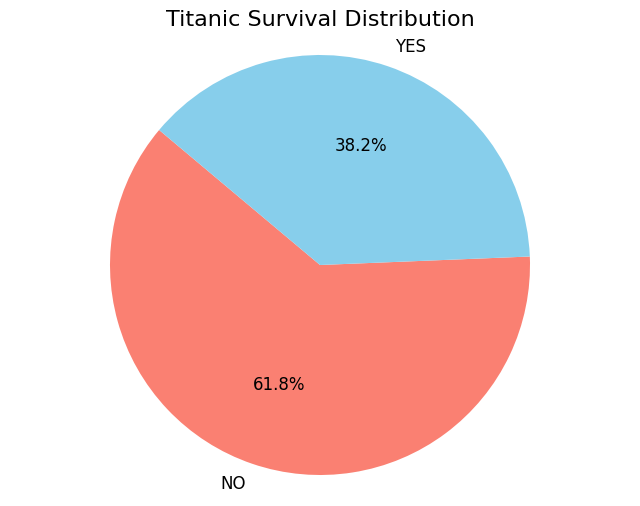

In [8]:
# Count the number of Survived and Didn't Survive passengers
survival_counts = df['Survived'].value_counts()
# Define consistent colors for the pie chart
colors = [ 'salmon','skyblue']
# Create the pie chart
plt.figure(figsize=(8,6))  # Set the figure size
plt.pie(
    survival_counts,            # Data to plot
    labels=survival_counts.index, # Labels for each slice
    autopct='%1.1f%%',           # Display percentage on the pie chart
    startangle=140,              # Rotate the start of the pie chart for better look
    colors=colors,               # Use the defined color palette
    textprops={'fontsize': 12}   # Set font size of labels
)
# Add a title to the chart
plt.title('Titanic Survival Distribution', fontsize=16)
# Make sure the pie chart is a circle (not an oval)
plt.axis('equal')
# Display the chart
plt.show()

### Unfortunately, very few passangers where able to suvive.

## **Gender**

In [32]:
#now because we'll be doing most of the analysis on the basis of survived and not survived, here we make 2 seprate datasets.
survived_df = df[df['Survived'] == 'YES']
not_survived_df = df[df['Survived'] == 'NO']

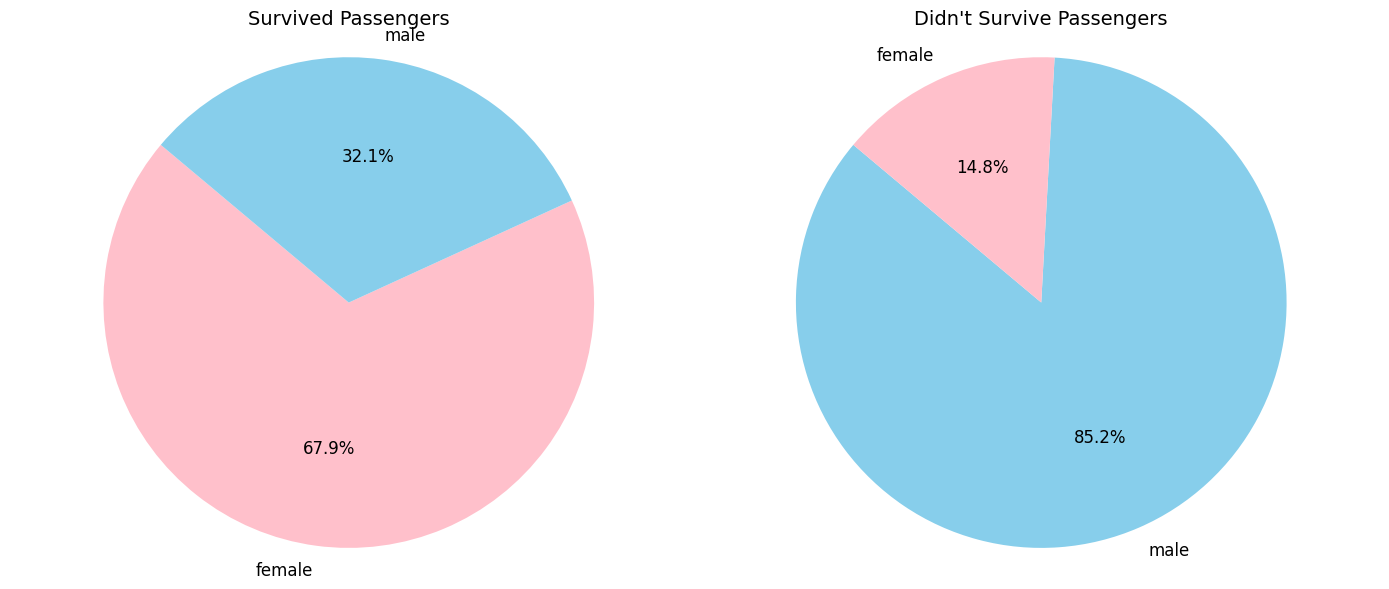

In [10]:
survived_gender_counts = survived_df['Sex'].value_counts()
not_survived_gender_counts = not_survived_df['Sex'].value_counts()

plt.figure(figsize=(14,6))  # Set figure size for both pies side by side

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.pie(
    survived_gender_counts, 
    labels=survived_gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors = [ 'pink','skyblue'],
    textprops={'fontsize': 12}
)
plt.title('Survived Passengers', fontsize=14)
plt.axis('equal')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.pie(
    not_survived_gender_counts, 
    labels=not_survived_gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors = ['skyblue', 'pink'],
    textprops={'fontsize': 12}
)
plt.title("Didn't Survive Passengers", fontsize=14)
plt.axis('equal')


plt.tight_layout()
plt.show()


### Survival rate of women is higher than men

## **Age**

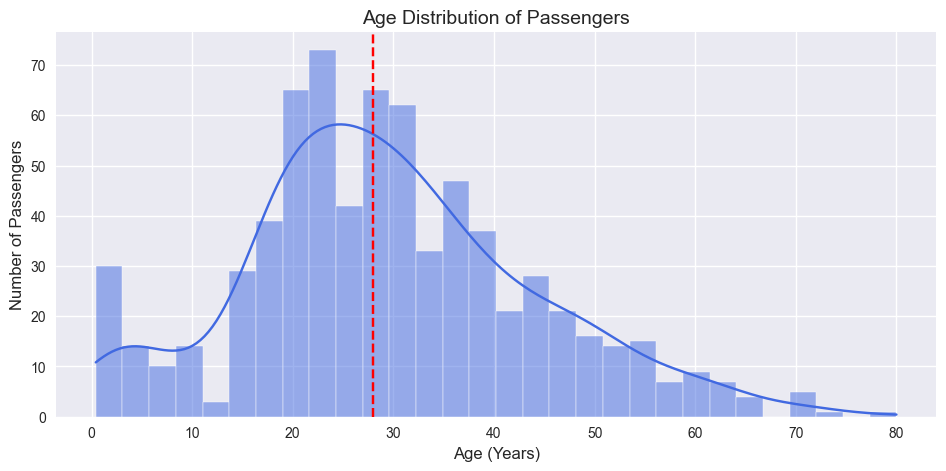

In [33]:
# Set the style (using 'seaborn-v0_8' which is the current style name)
plt.style.use('seaborn-v0_8')

# Create figure with two subplots
plt.figure(figsize=(25, 5))

# Histogram of Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=30, kde=True, color='royalblue')
plt.title('Age Distribution of Passengers', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.axvline(x=df['Age'].median(), color='red', linestyle='--', 
            label=f'Median: {df["Age"].median():.1f} years')

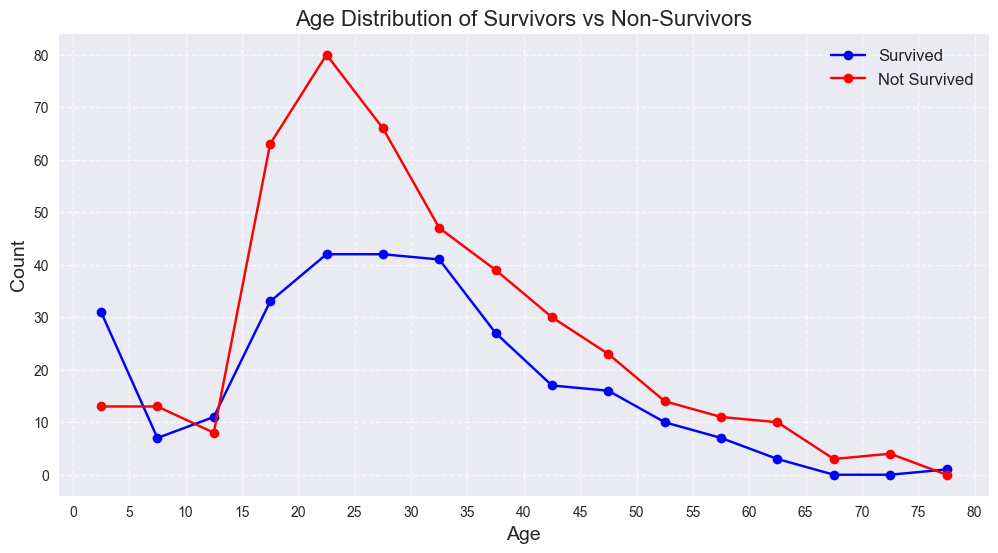

In [34]:
survived_age=survived_df['Age'].dropna()
not_survived_age=not_survived_df['Age'].dropna()
# Create bins for age groups
bins = range(0, 85, 5)

# Calculate value counts for each group
survived_counts = survived_age.value_counts(bins=bins, sort=False)
not_survived_counts = not_survived_age.value_counts(bins=bins, sort=False)

# Create figure
plt.figure(figsize=(12, 6))

# Plot lines
plt.plot(survived_counts.index.mid, survived_counts.values, 
         color='blue', label='Survived', marker='o')
plt.plot(not_survived_counts.index.mid, not_survived_counts.values, 
         color='red', label='Not Survived', marker='o')

# Add title and labels
plt.title('Age Distribution of Survivors vs Non-Survivors', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(bins)

# Customize grid and spines
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()

# Show plot
plt.show()

### Childern survived more and Young-Adults had low survive rate

## **Fare**

In [35]:
# Dividing 'Fare' into 20 quantile-based bins
fare_bins = pd.qcut(df['Fare'], q=20)

# Calculate survival rate for each fare bin
fare_survival = df.groupby(fare_bins, observed=True)['Survived'].apply(
    lambda x: (x == 'YES').mean() * 100
).reset_index()

# Convert fare bins to string for plotting
fare_survival['Fare_Range'] = fare_survival['Fare'].astype(str)

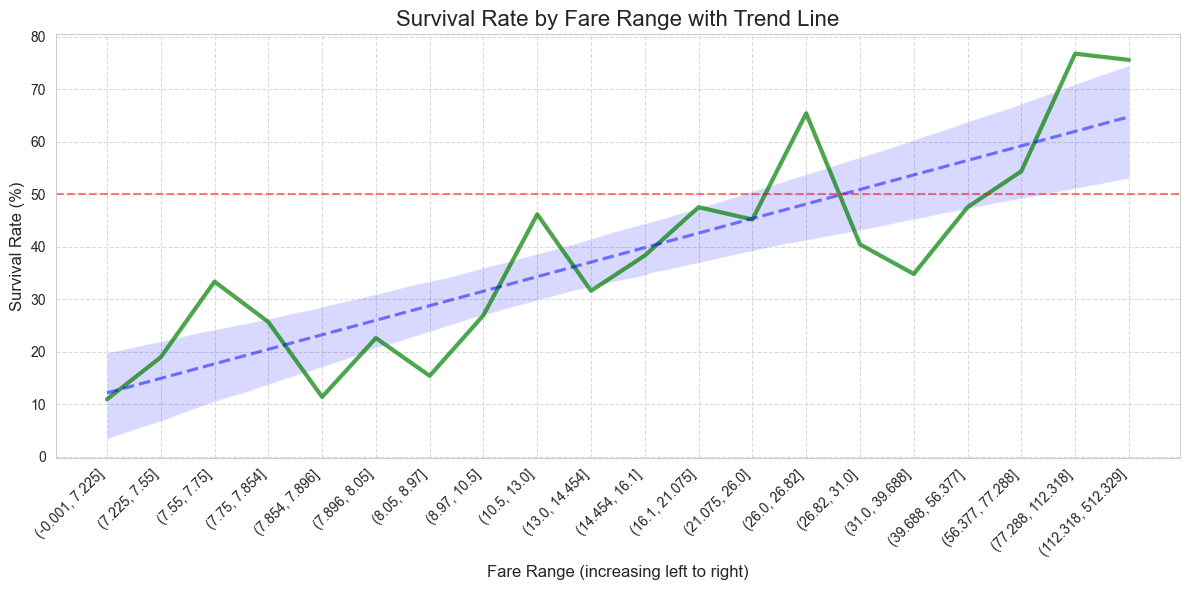

In [19]:
# Create the plot with a smoother line
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=fare_survival,
    x='Fare_Range',
    y='Survived',
    color='green',
    linewidth=3,
    alpha=0.7,
    estimator=None  # This gives us the raw data points
)

# Add a regression line to show the trend
sns.regplot(
    x=np.arange(len(fare_survival)),
    y=fare_survival['Survived'],
    scatter=False,
    color='blue',
    line_kws={'linestyle': '--', 'alpha': 0.5}
)

plt.title('Survival Rate by Fare Range with Trend Line', fontsize=16)
plt.xlabel('Fare Range (increasing left to right)', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=50, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Rate of survival was higher for those who paid more

## **Family**

### Person have higher number of siblings or spouses have higher rate of surival than one who is having higher number of childern.

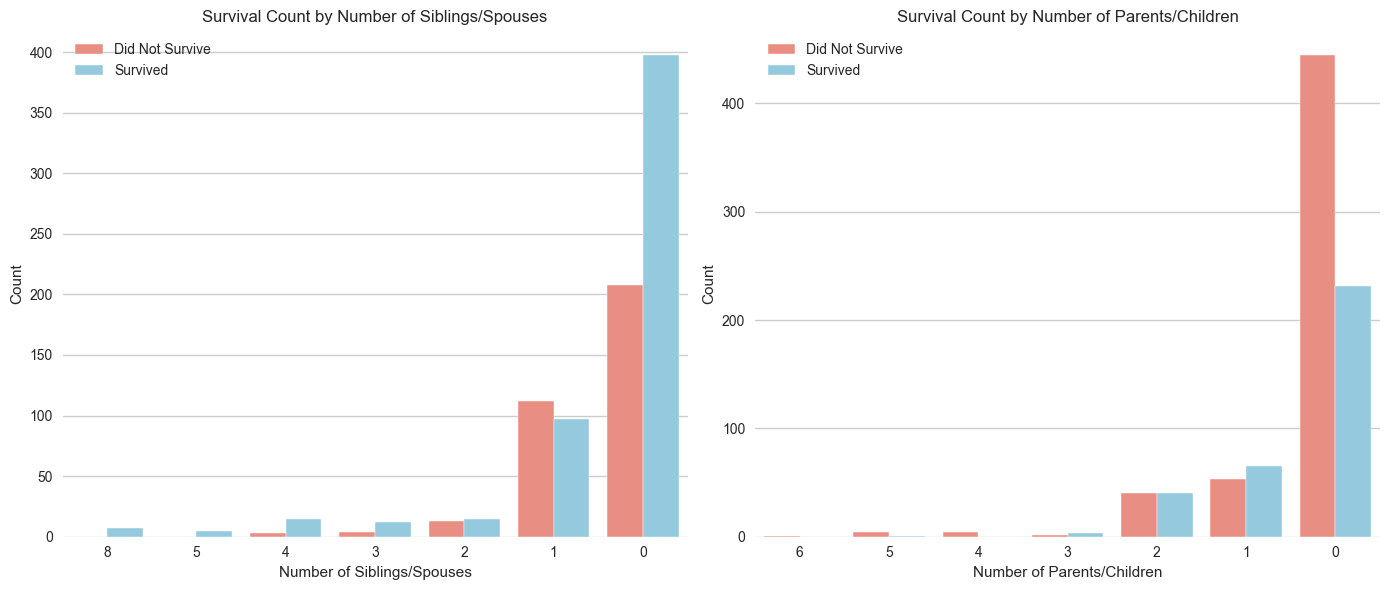

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Survival Rate by SibSp (descending order of x-axis)
plt.subplot(1, 2, 1)
# Sorting the data by 'SibSp' in descending order
sns.countplot(x='SibSp', hue='Survived', data=df, palette={'NO': 'skyblue', 'YES': 'salmon'}, order=sorted(df['SibSp'].unique(), reverse=True))
plt.title('Survival Count by Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])

# Subplot 2: Survival Rate by Parch (descending order of x-axis)
plt.subplot(1, 2, 2)
# Sorting the data by 'Parch' in descending order
sns.countplot(x='Parch', hue='Survived', data=df, palette={'NO': 'salmon', 'YES': 'skyblue'}, order=sorted(df['Parch'].unique(), reverse=True))
plt.title('Survival Count by Number of Parents/Children')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])

plt.tight_layout()
plt.show()


# Conclusion

Although, unfortunately, more than 50% of the passengers perished in the Titanic tragedy, several insights can be drawn from the data:

- **Survival by Gender**: Women had higher chances of survival compared to men, reflecting the priority given to women and children during the evacuation.
  
- **Fare and Survival**: Passengers with higher fare classes generally had better chances of survival. This suggests that wealthier passengers were more likely to receive better services and access to lifeboats.

- **Age and Survival**: Young adults, unfortunately, did not fare well in terms of survival. This might be because they were more likely to stay behind, possibly attempting to save others.

- **Siblings and Spouses**: Passengers traveling with siblings or spouses were more likely to survive, as they supported each other during the chaos.

- **Families with Children**: Tragically, families with babies or young children had a lower survival rate. This might be due to the difficulties in evacuating families with infants, who needed extra care and attention during the disaster.

In summary, this analysis of Titanic passengers highlights the varying factors that influenced survival, from gender and class to age and family structure.

